# Network attacks - Detection

## I - Modules

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_curve,roc_auc_score,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## II - Charger donnée

Utilisons donnée préparée :

In [14]:
def load_data(size):
    if size=="full":
        df_normal = pd.read_csv("preparation/network_normal.csv")
        df_attack_1 = pd.read_csv("preparation/network_1.csv")
        df_attack_2 = pd.read_csv("preparation/network_2.csv")
        df_attack_3 = pd.read_csv("preparation/network_3.csv")
        df_attack_4 = pd.read_csv("preparation/network_4.csv")
    
    elif size=="/2":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 2 != 0)
    
    elif size=="/4":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 4 != 0)
    
    elif size=="/10":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 10 != 0)
    
    return df_normal, df_attack_1, df_attack_2, df_attack_3, df_attack_4

In [15]:
df_normal, df_attack_1, df_attack_2, df_attack_3, df_attack_4 = load_data("/10")

## III - Fonctions

### 1 - Matrice de confusion

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



import os

def plot_confusion_matrix(y_preds, y_true, labels, save_cof_mat=False, conf_mat_name="conf_mat", model_name="model"):
    cm = confusion_matrix(y_true, y_preds,normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))

    labels_for_fig = [(l[0:4]+'.' if isinstance(l, str) else str(l)) for l in labels]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels_for_fig)
    try:
        disp.plot(cmap="Blues", values_format="4f", ax=ax, colorbar=False)

        if save_cof_mat:
            # Create the folder if it doesn't exist
            folder_path = f"./images/network/Results/{model_name}/Confusion_matrix"
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            plt.savefig(f"{folder_path}/{conf_mat_name}.png")
    except:
        print("Error")
        print(pd.unique(y_preds))
        print(pd.unique(y_true))
        print(labels)
    plt.title("Normalized confusion matrix")
    plt.show()



def eval_model(y_pred, y_test, labels, save_cof_mat=False, conf_mat_name="conf_mat", model_name="model"):
    plot_confusion_matrix(list(y_pred), list(y_test), labels, save_cof_mat, conf_mat_name, model_name)

    print(classification_report(y_test, y_pred))
    
    # Print the confusion matrix directly
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    # Compute and print metrics for each class
    for i, label in enumerate(labels):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)

        # print("tp", tp)
        # print("fp", fp)
        # print("fn", fn)
        # print("tn", tn)
        
        tnr = tn / (tn + fp)  # True negative rate
        tpr = tp / (tp + fn)  # True positive rate
        fnr = fn / (fn + tp)  # False negative rate
        fpr = fp / (fp + tn)  # False positive rate

        
        
        print(f"\nMetrics for class {label}:")
        print(f"True negative rate: {tnr:.4f}")
        print(f"True positive rate: {tpr:.4f}")
        print(f"False negative rate: {fnr:.4f}")
        print(f"False positive rate: {fpr:.4f}")
    
    
    

### 2 - KNN

In [17]:
def KNN_attack_detection(df, name_df="xxx", model_name="xxx"):
    new_df = df.copy()
    print("taille",len(df))
    X = new_df.drop('label', axis=1)  # Caractéristiques
    y = new_df['label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    k = len(pd.unique(y_test))
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)


    y_pred = knn_model.predict(X_test)
    eval_model(y_pred, y_test, knn_model.classes_, True, name_df, model_name)

### 3 - Random Forest

In [18]:
# Import the model we are using
# Instantiate model with 1000 decision trees


from sklearn.ensemble import RandomForestClassifier

def randomForest_attack_detector(df, name_df="xxx", model_name="xxx"):
    new_df = df.copy()
    n = 0
    labels = pd.unique(new_df["label"])
    mapping = {}
    for label in labels:
        mapping[label] = n
        n += 1

    new_df["label"] = new_df["label"].map(mapping)
    
    X = new_df.drop('label', axis=1)  # Features
    y = new_df['label']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    rf = RandomForestClassifier(n_estimators=20, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    eval_model(y_pred, y_test, rf.classes_, True, name_df, model_name)

## IV - Detection

### 1 - KNN



df_attack_1
taille 552689


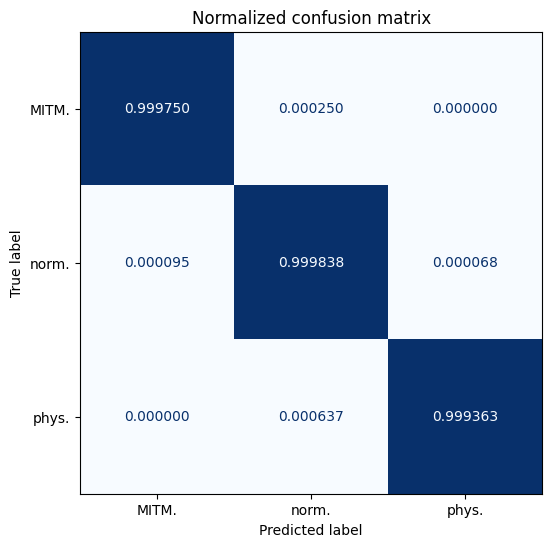

                precision    recall  f1-score   support

          MITM       1.00      1.00      1.00     23962
        normal       1.00      1.00      1.00     74016
physical fault       1.00      1.00      1.00     12560

      accuracy                           1.00    110538
     macro avg       1.00      1.00      1.00    110538
  weighted avg       1.00      1.00      1.00    110538


Metrics for class MITM:
True negative rate: 0.9999
True positive rate: 0.9997
False negative rate: 0.0003
False positive rate: 0.0001

Metrics for class normal:
True negative rate: 0.9996
True positive rate: 0.9998
False negative rate: 0.0002
False positive rate: 0.0004

Metrics for class physical fault:
True negative rate: 0.9999
True positive rate: 0.9994
False negative rate: 0.0006
False positive rate: 0.0001


df_attack_2
taille 477408


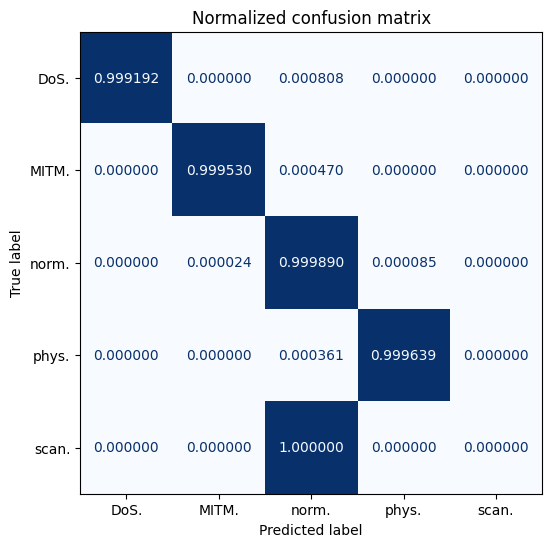

c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                precision    recall  f1-score   support

           DoS       1.00      1.00      1.00      3712
          MITM       1.00      1.00      1.00      4255
        normal       1.00      1.00      1.00     81975
physical fault       1.00      1.00      1.00      5539
          scan       0.00      0.00      0.00         1

      accuracy                           1.00     95482
     macro avg       0.80      0.80      0.80     95482
  weighted avg       1.00      1.00      1.00     95482


Metrics for class DoS:
True negative rate: 1.0000
True positive rate: 0.9992
False negative rate: 0.0008
False positive rate: 0.0000

Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 0.9995
False negative rate: 0.0005
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.9994
True positive rate: 0.9999
False negative rate: 0.0001
False positive rate: 0.0006

Metrics for class physical fault:
True negative rate: 0.9999
True positive rate: 0.999

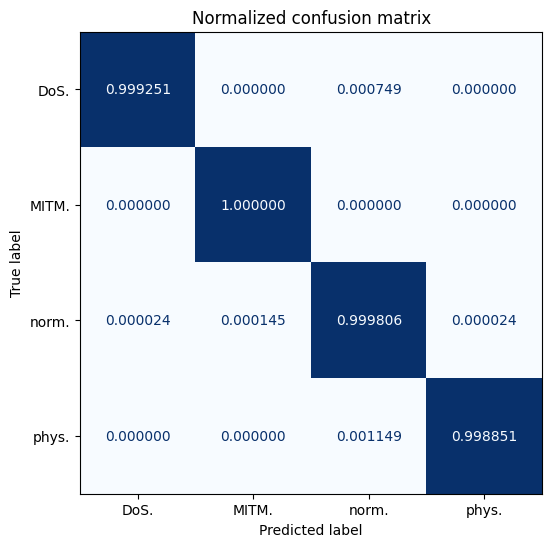

                precision    recall  f1-score   support

           DoS       1.00      1.00      1.00      2671
          MITM       1.00      1.00      1.00      4985
        normal       1.00      1.00      1.00     41296
physical fault       1.00      1.00      1.00      6963

      accuracy                           1.00     55915
     macro avg       1.00      1.00      1.00     55915
  weighted avg       1.00      1.00      1.00     55915


Metrics for class DoS:
True negative rate: 1.0000
True positive rate: 0.9993
False negative rate: 0.0007
False positive rate: 0.0000

Metrics for class MITM:
True negative rate: 0.9999
True positive rate: 1.0000
False negative rate: 0.0000
False positive rate: 0.0001

Metrics for class normal:
True negative rate: 0.9993
True positive rate: 0.9998
False negative rate: 0.0002
False positive rate: 0.0007

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.9989
False negative rate: 0.0011
False positive rate: 0.000

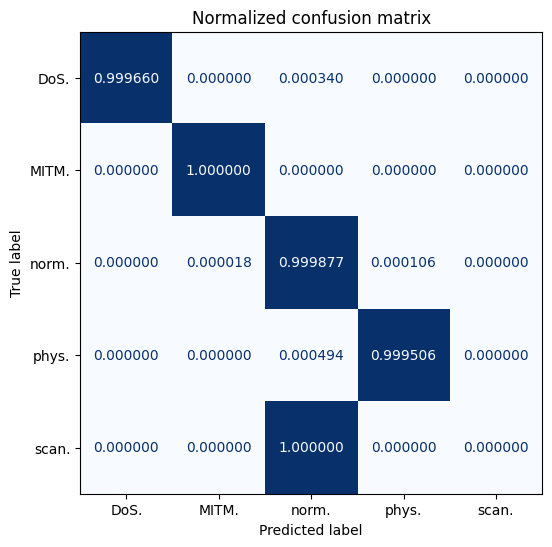

c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           DoS       1.00      1.00      1.00     14692
          MITM       1.00      1.00      1.00      9478
        normal       1.00      1.00      1.00     56755
physical fault       1.00      1.00      1.00      6077
          scan       0.00      0.00      0.00         2

      accuracy                           1.00     87004
     macro avg       0.80      0.80      0.80     87004
  weighted avg       1.00      1.00      1.00     87004


Metrics for class DoS:
True negative rate: 1.0000
True positive rate: 0.9997
False negative rate: 0.0003
False positive rate: 0.0000

Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 1.0000
False negative rate: 0.0000
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.9997
True positive rate: 0.9999
False negative rate: 0.0001
False positive rate: 0.0003

Metrics for class physical fault:
True negative rate: 0.9999
True positive rate: 0.999

c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
dataframes = [df_attack_1, df_attack_2, df_attack_3, df_attack_4]
dataframes_name = ['df_attack_1', 'df_attack_2', 'df_attack_3', 'df_attack_4']

i=0
for df in dataframes:
    print("\n\n\033[1;33m" + dataframes_name[i] + "\033[0m")
    KNN_attack_detection(df, dataframes_name[i] + "_conf_mat", "KNN")
    i+=1

taille 1744686


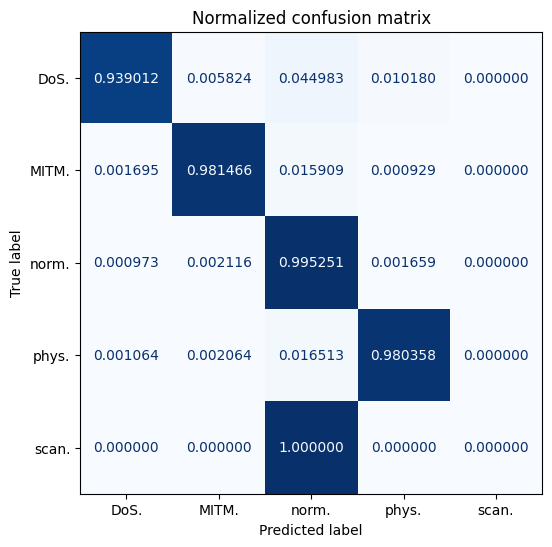

c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                precision    recall  f1-score   support

           DoS       0.98      0.94      0.96     21119
          MITM       0.98      0.98      0.98     43057
        normal       0.99      1.00      0.99    253754
physical fault       0.98      0.98      0.98     31005
          scan       0.00      0.00      0.00         3

      accuracy                           0.99    348938
     macro avg       0.79      0.78      0.78    348938
  weighted avg       0.99      0.99      0.99    348938


Metrics for class DoS:
True negative rate: 0.9989
True positive rate: 0.9390
False negative rate: 0.0610
False positive rate: 0.0011

Metrics for class MITM:
True negative rate: 0.9976
True positive rate: 0.9815
False negative rate: 0.0185
False positive rate: 0.0024

Metrics for class normal:
True negative rate: 0.9774
True positive rate: 0.9953
False negative rate: 0.0047
False positive rate: 0.0226

Metrics for class physical fault:
True negative rate: 0.9979
True positive rate: 0.980

In [20]:
KNN_attack_detection(pd.concat([df_attack_1,df_attack_2,df_attack_3,df_attack_4]),"all_attacks_conf_mat", "KNN")

taille 2520414


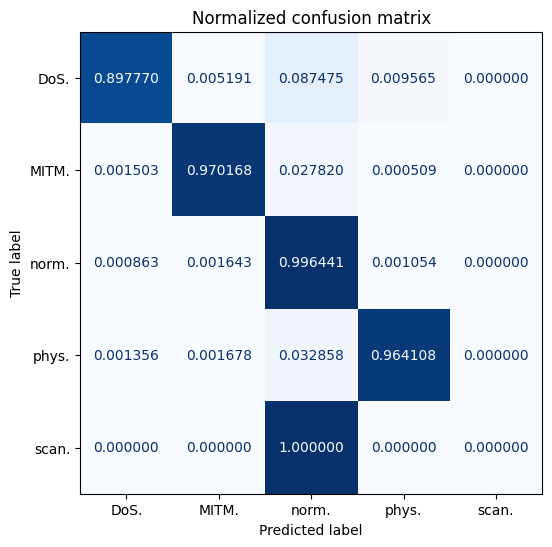

c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                precision    recall  f1-score   support

           DoS       0.98      0.90      0.94     20806
          MITM       0.98      0.97      0.98     43242
        normal       0.99      1.00      0.99    409051
physical fault       0.98      0.96      0.97     30982
          scan       0.00      0.00      0.00         2

      accuracy                           0.99    504083
     macro avg       0.79      0.77      0.78    504083
  weighted avg       0.99      0.99      0.99    504083


Metrics for class DoS:
True negative rate: 0.9990
True positive rate: 0.8978
False negative rate: 0.1022
False positive rate: 0.0010

Metrics for class MITM:
True negative rate: 0.9982
True positive rate: 0.9702
False negative rate: 0.0298
False positive rate: 0.0018

Metrics for class normal:
True negative rate: 0.9575
True positive rate: 0.9964
False negative rate: 0.0036
False positive rate: 0.0425

Metrics for class physical fault:
True negative rate: 0.9986
True positive rate: 0.964

In [21]:
KNN_attack_detection(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_&_normal_conf_mat", "KNN")

### 2 - Random forest



df_attack_1


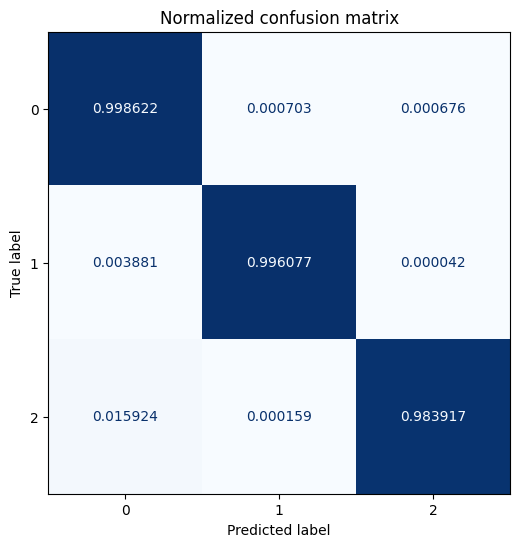

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74016
           1       1.00      1.00      1.00     23962
           2       1.00      0.98      0.99     12560

    accuracy                           1.00    110538
   macro avg       1.00      0.99      0.99    110538
weighted avg       1.00      1.00      1.00    110538


Metrics for class 0:
True negative rate: 0.9920
True positive rate: 0.9986
False negative rate: 0.0014
False positive rate: 0.0080

Metrics for class 1:
True negative rate: 0.9994
True positive rate: 0.9961
False negative rate: 0.0039
False positive rate: 0.0006

Metrics for class 2:
True negative rate: 0.9995
True positive rate: 0.9839
False negative rate: 0.0161
False positive rate: 0.0005


df_attack_2


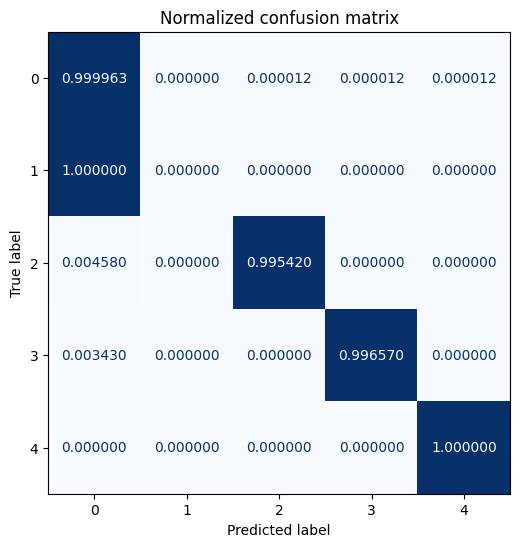

c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81975
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00      3712
           3       1.00      1.00      1.00      5539
           4       1.00      1.00      1.00      4255

    accuracy                           1.00     95482
   macro avg       0.80      0.80      0.80     95482
weighted avg       1.00      1.00      1.00     95482


Metrics for class 0:
True negative rate: 0.9973
True positive rate: 1.0000
False negative rate: 0.0000
False positive rate: 0.0027

Metrics for class 1:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class 2:
True negative rate: 1.0000
True positive rate: 0.9954
False negative rate: 0.0046
False positive rate: 0.0000

Metrics for class 3:
True negative rate: 1.0000
True positive rate: 0.9966
False negative rate: 0.0034
False posit

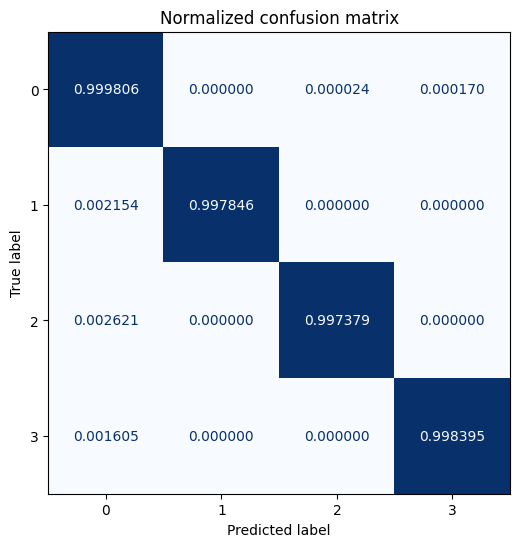

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41296
           1       1.00      1.00      1.00      6963
           2       1.00      1.00      1.00      2671
           3       1.00      1.00      1.00      4985

    accuracy                           1.00     55915
   macro avg       1.00      1.00      1.00     55915
weighted avg       1.00      1.00      1.00     55915


Metrics for class 0:
True negative rate: 0.9979
True positive rate: 0.9998
False negative rate: 0.0002
False positive rate: 0.0021

Metrics for class 1:
True negative rate: 1.0000
True positive rate: 0.9978
False negative rate: 0.0022
False positive rate: 0.0000

Metrics for class 2:
True negative rate: 1.0000
True positive rate: 0.9974
False negative rate: 0.0026
False positive rate: 0.0000

Metrics for class 3:
True negative rate: 0.9999
True positive rate: 0.9984
False negative rate: 0.0016
False positive rate: 0.0001


df_attack_4


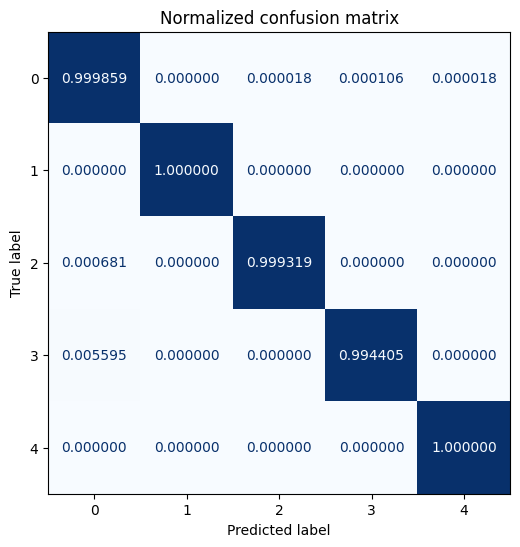

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56755
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00     14692
           3       1.00      0.99      1.00      6077
           4       1.00      1.00      1.00      9478

    accuracy                           1.00     87004
   macro avg       1.00      1.00      1.00     87004
weighted avg       1.00      1.00      1.00     87004


Metrics for class 0:
True negative rate: 0.9985
True positive rate: 0.9999
False negative rate: 0.0001
False positive rate: 0.0015

Metrics for class 1:
True negative rate: 1.0000
True positive rate: 1.0000
False negative rate: 0.0000
False positive rate: 0.0000

Metrics for class 2:
True negative rate: 1.0000
True positive rate: 0.9993
False negative rate: 0.0007
False positive rate: 0.0000

Metrics for class 3:
True negative rate: 0.9999
True positive rate: 0.9944
False negative rate: 0.0056
False posit

In [22]:
dataframes = [df_attack_1, df_attack_2, df_attack_3, df_attack_4]
dataframes_name = ['df_attack_1', 'df_attack_2', 'df_attack_3', 'df_attack_4']

i=0
for df in dataframes:
    print("\n\n\033[1;33m" + dataframes_name[i] + "\033[0m")
    randomForest_attack_detector(df, dataframes_name[i] + "_conf_mat", "Random_forest")
    i+=1

In [23]:
randomForest_attack_detector(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_conf_mat", "Random_forest")

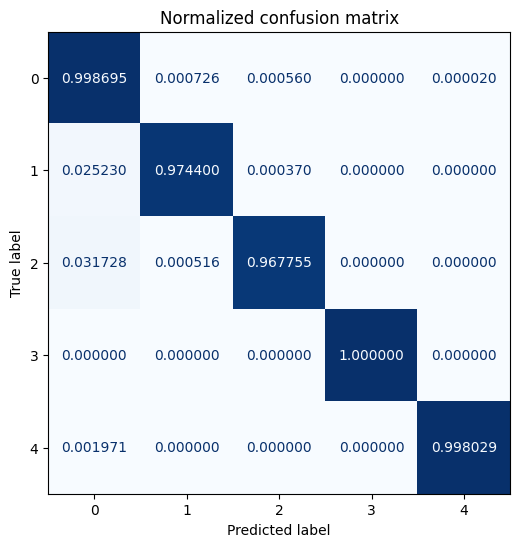

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    409051
           1       0.99      0.97      0.98     43242
           2       0.99      0.97      0.98     30982
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00     20806

    accuracy                           0.99    504083
   macro avg       1.00      0.99      0.99    504083
weighted avg       0.99      0.99      0.99    504083


Metrics for class 0:
True negative rate: 0.9777
True positive rate: 0.9987
False negative rate: 0.0013
False positive rate: 0.0223

Metrics for class 1:
True negative rate: 0.9993
True positive rate: 0.9744
False negative rate: 0.0256
False positive rate: 0.0007

Metrics for class 2:
True negative rate: 0.9995
True positive rate: 0.9678
False negative rate: 0.0322
False positive rate: 0.0005

Metrics for class 3:
True negative rate: 1.0000
True positive rate: 1.0000
False negative rate: 0.0000
False posit

In [ ]:
randomForest_attack_detector(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_&_normal_conf_mat", "Random_forest")